# Generalized Linear Models

In [1]:
%matplotlib inline

from __future__ import print_function
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

## GLM: Binomial response data

### Load data

 In this example, we use the Star98 dataset which was taken with permission
 from Jeff Gill (2000) Generalized linear models: A unified approach. Codebook
 information can be obtained by typing: 

In [3]:
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

Load the data and add a constant to the exogenous (independent) variables:

In [4]:
data = sm.datasets.star98.load()
data.exog = sm.add_constant(data.exog, prepend=False)

 The dependent variable is N by 2 (Success: NABOVE, Failure: NBELOW): 

In [5]:
print(data.endog[:5,:])

[[ 452.  355.]
 [ 144.   40.]
 [ 337.  234.]
 [ 395.  178.]
 [   8.   57.]]


 The independent variables include all the other variables described above, as
 well as the interaction terms:

In [6]:
print(data.exog[:2,:])

[[  3.43973000e+01   2.32993000e+01   1.42352800e+01   1.14111200e+01
    1.59183700e+01   1.47064600e+01   5.91573200e+01   4.44520700e+00
    2.17102500e+01   5.70327600e+01   0.00000000e+00   2.22222200e+01
    2.34102872e+02   9.41688110e+02   8.69994800e+02   9.65065600e+01
    2.53522420e+02   1.23819550e+03   1.38488985e+04   5.50403520e+03
    1.00000000e+00]
 [  1.73650700e+01   2.93283800e+01   8.23489700e+00   9.31488400e+00
    1.36363600e+01   1.60832400e+01   5.95039700e+01   5.26759800e+00
    2.04427800e+01   6.46226400e+01   0.00000000e+00   0.00000000e+00
    2.19316851e+02   8.11417560e+02   9.57016600e+02   1.07684350e+02
    3.40406090e+02   1.32106640e+03   1.30502233e+04   6.95884680e+03
    1.00000000e+00]]


### Fit and summary

In [7]:
glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2998.6
Date:                Sat, 07 Jul 2018   Deviance:                       4078.8
Time:                        15:23:39   Pearson chi2:                 4.05e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.000    -38.749      0.000      -0.018      -0.016
x2             0.0099      0.001     16.505      0.0

### Quantities of interest

In [8]:
print('Total number of trials:',  data.endog[0].sum())
print('Parameters: ', res.params)
print('T-values: ', res.tvalues)

Total number of trials: 807.0
Parameters:  [ -1.68150366e-02   9.92547661e-03  -1.87242148e-02  -1.42385609e-02
   2.54487173e-01   2.40693664e-01   8.04086739e-02  -1.95216050e+00
  -3.34086475e-01  -1.69022168e-01   4.91670212e-03  -3.57996435e-03
  -1.40765648e-02  -4.00499176e-03  -3.90639579e-03   9.17143006e-02
   4.89898381e-02   8.04073890e-03   2.22009503e-04  -2.24924861e-03
   2.95887793e+00]
T-values:  [-38.74908321  16.50473627 -25.1821894  -32.81791308   8.49827113
   4.21247925   5.7749976   -6.16191078  -5.45321673  -5.16865445
   3.92119964 -15.87825999  -7.39093058  -8.44963886  -4.05916246
   6.3210987    6.57434662   5.36229044   7.42806363  -6.44513698
   1.91301155]


First differences: We hold all explanatory variables constant at their means and manipulate the percentage of low income households to assess its impact on the response variables: 

In [9]:
means = data.exog.mean(axis=0)
means25 = means.copy()
means25[0] = stats.scoreatpercentile(data.exog[:,0], 25)
means75 = means.copy()
means75[0] = lowinc_75per = stats.scoreatpercentile(data.exog[:,0], 75)
resp_25 = res.predict(means25)
resp_75 = res.predict(means75)
diff = resp_75 - resp_25

The interquartile first difference for the percentage of low income households in a school district is:

In [10]:
print("%2.4f%%" % (diff*100))

-11.8753%


### Plots

 We extract information that will be used to draw some interesting plots: 

In [11]:
nobs = res.nobs
y = data.endog[:,0]/data.endog.sum(1)
yhat = res.mu

Plot yhat vs y:

In [12]:
from statsmodels.graphics.api import abline_plot

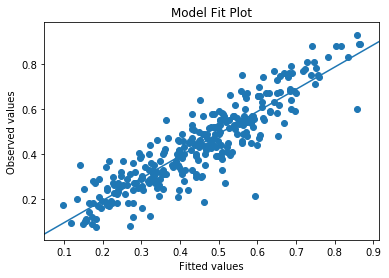

In [13]:
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

Plot yhat vs. Pearson residuals:

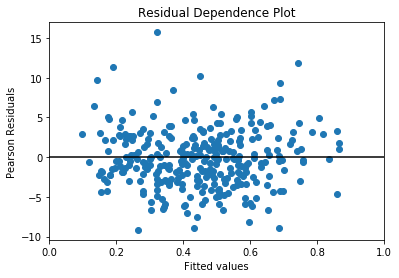

In [14]:
fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

Histogram of standardized deviance residuals:

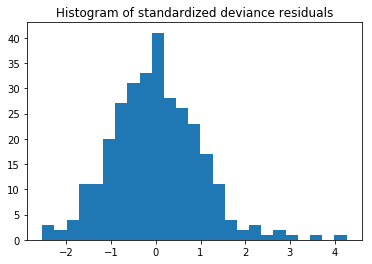

In [15]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

QQ Plot of Deviance Residuals:

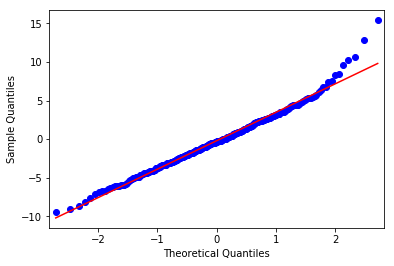

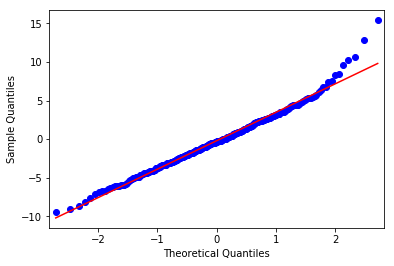

In [16]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

## GLM: Gamma for proportional count response

### Load data

 In the example above, we printed the ``NOTE`` attribute to learn about the
 Star98 dataset. Statsmodels datasets ships with other useful information. For
 example: 

In [17]:
print(sm.datasets.scotland.DESCRLONG)


This data is based on the example in Gill and describes the proportion of
voters who voted Yes to grant the Scottish Parliament taxation powers.
The data are divided into 32 council districts.  This example's explanatory
variables include the amount of council tax collected in pounds sterling as
of April 1997 per two adults before adjustments, the female percentage of
total claims for unemployment benefits as of January, 1998, the standardized
mortality rate (UK is 100), the percentage of labor force participation,
regional GDP, the percentage of children aged 5 to 15, and an interaction term
between female unemployment and the council tax.

The original source files and variable information are included in
/scotland/src/



 Load the data and add a constant to the exogenous variables:

In [18]:
data2 = sm.datasets.scotland.load()
data2.exog = sm.add_constant(data2.exog, prepend=False)
print(data2.exog[:5,:])
print(data2.endog[:5])

[[  7.12000000e+02   2.10000000e+01   1.05000000e+02   8.24000000e+01
    1.35660000e+04   1.23000000e+01   1.49520000e+04   1.00000000e+00]
 [  6.43000000e+02   2.65000000e+01   9.70000000e+01   8.02000000e+01
    1.35660000e+04   1.53000000e+01   1.70395000e+04   1.00000000e+00]
 [  6.79000000e+02   2.83000000e+01   1.13000000e+02   8.63000000e+01
    9.61100000e+03   1.39000000e+01   1.92157000e+04   1.00000000e+00]
 [  8.01000000e+02   2.71000000e+01   1.09000000e+02   8.04000000e+01
    9.48300000e+03   1.36000000e+01   2.17071000e+04   1.00000000e+00]
 [  7.53000000e+02   2.20000000e+01   1.15000000e+02   6.47000000e+01
    9.26500000e+03   1.46000000e+01   1.65660000e+04   1.00000000e+00]]
[ 60.3  52.3  53.4  57.   68.7]


### Fit and summary

In [19]:
glm_gamma = sm.GLM(data2.endog, data2.exog, family=sm.families.Gamma())
glm_results = glm_gamma.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Sat, 07 Jul 2018   Deviance:                     0.087389
Time:                        15:23:52   Pearson chi2:                   0.0860
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.962e-05   1.62e-05      3.060      0.002    1.78e-05    8.14e-05
x2             0.0020      0.001      3.824      0.0

/Users/harley/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


## GLM: Gaussian distribution with a noncanonical link

### Artificial data

In [20]:
nobs2 = 100
x = np.arange(nobs2)
np.random.seed(54321)
X = np.column_stack((x,x**2))
X = sm.add_constant(X, prepend=False)
lny = np.exp(-(.03*x + .0001*x**2 - 1.0)) + .001 * np.random.rand(nobs2)

### Fit and summary

In [21]:
gauss_log = sm.GLM(lny, X, family=sm.families.Gaussian(sm.families.links.log))
gauss_log_results = gauss_log.fit()
print(gauss_log_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Gaussian   Df Model:                            2
Link Function:                    log   Scale:                      1.0531e-07
Method:                          IRLS   Log-Likelihood:                 662.92
Date:                Sat, 07 Jul 2018   Deviance:                   1.0215e-05
Time:                        15:23:53   Pearson chi2:                 1.02e-05
No. Iterations:                     7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0300    5.6e-06  -5361.316      0.000      -0.030      -0.030
x2         -9.939e-05   1.05e-07   -951.091      0.0